<a href="https://colab.research.google.com/github/VivekanandaMudelli/hand_drawn_sketch_recognition/blob/main/KNN(CNN_Pca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_id = "1QfzguI680h2Od7VXoPTypVr2h-DWwvkk"

# Construct the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "data.csv"  # Change filename as needed
gdown.download(download_url, output, quiet=False)

# Read the CSV file
data = pd.read_csv(output)
data = data.dropna()

# X = data.drop(columns = ['label'])
# y = data['label']
X = data.drop(data.columns[0],axis = 1).drop(columns = ['encoded_part','extracted_part'])
y = data['extracted_part']

print(X.shape)
print(y.shape)

Downloading...
From (original): https://drive.google.com/uc?id=1QfzguI680h2Od7VXoPTypVr2h-DWwvkk
From (redirected): https://drive.google.com/uc?id=1QfzguI680h2Od7VXoPTypVr2h-DWwvkk&confirm=t&uuid=f9163b93-8657-4236-bf2e-0a07c15a3ce3
To: /content/data.csv
100%|██████████| 634M/634M [00:11<00:00, 56.8MB/s]


(16000, 2048)
(16000,)


In [5]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std.replace(0,1e-10)

In [6]:
# Importing PCA
from sklearn.decomposition import PCA

# Taking top 50 dimensions
pca = PCA(n_components=500)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(500)])
print(df)

             PC1        PC2        PC3        PC4        PC5        PC6  \
0     -17.389299  11.745196  -9.281998   7.451107   0.483165   0.587576   
1       9.458580  -3.565562 -15.879472  -7.899002  -6.920963  -1.911217   
2     -12.691148   9.079129  -3.546838   4.815350   4.587624   0.938280   
3      -1.723694   5.647300 -15.946122   0.800391   2.665475  -0.919261   
4     -23.614402  10.203870  -5.219199  -5.574987  -8.176104  -1.130938   
...          ...        ...        ...        ...        ...        ...   
15995  29.342983  19.425747  15.814522  -0.653214 -18.198542   2.702877   
15996  26.624242  21.693238   9.062562   3.554492 -12.339963   9.148073   
15997  33.634545  24.298709  14.445170   2.329211 -11.543452  11.711542   
15998  10.408893  10.138322  -0.224529  16.177245   8.627013  -6.234961   
15999  35.803129  16.953130  11.977682   5.984244 -11.204154   5.809444   

             PC7       PC8       PC9      PC10  ...     PC491     PC492  \
0      -3.533000 -3.2475

In [7]:
df = X

In [8]:
df['label'] = y

In [9]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,0.096372,0.290125,0.023769,0.020769,0.128336,0.088538,0.351039,0.036722,0.311688,0.078628,...,0.435481,0.015574,0.120894,0.689553,0.089658,0.014231,0.157314,0.053497,0.050435,violin
1,0.697527,0.069318,0.256686,0.117609,0.198656,0.568475,0.901217,0.272297,0.680210,0.185290,...,0.154600,0.023181,0.407349,1.032929,0.018647,0.344770,0.277606,0.556503,0.006328,violin
2,0.023048,0.386680,0.000749,0.000000,0.425920,0.129222,0.672938,0.055085,0.085282,0.165081,...,0.352237,0.018148,0.008317,0.678952,0.015125,0.041926,0.114108,0.002703,0.059334,violin
3,0.314665,0.133836,0.076663,0.017955,0.466687,0.076860,0.976595,0.076357,0.105185,0.070259,...,0.310003,0.003540,0.320753,0.768330,0.044698,0.123987,0.379935,0.234035,0.196416,violin
4,0.045428,0.375057,0.027606,0.000000,0.251049,0.371285,0.109352,0.076543,0.369173,0.021124,...,0.054214,0.000000,0.037904,0.408619,0.017229,0.247702,0.295875,0.010435,0.002851,violin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.173298,0.288684,0.038316,0.046567,0.349442,0.125054,1.187389,0.365123,0.330671,0.033409,...,0.017071,0.078170,0.045820,0.278177,0.116832,0.096903,0.166981,0.208617,0.388443,apple
15996,0.200062,0.145902,0.015686,0.084857,0.419497,0.125800,0.780225,0.246931,0.607631,0.033852,...,0.032148,0.140179,0.036867,0.610447,0.119481,0.191841,0.403482,0.099671,0.178655,apple
15997,0.078571,0.066972,0.024510,0.017365,0.781149,0.114321,0.892347,0.525485,0.490710,0.021632,...,0.028364,0.158688,0.057387,0.573591,0.131755,0.327526,0.420424,0.082641,0.224793,apple
15998,0.014721,0.152039,0.107902,0.000000,0.311134,0.093912,0.952523,0.152570,0.485024,0.069921,...,0.478958,0.000000,0.345436,0.864554,0.029831,0.261657,0.497965,0.282121,0.129772,apple


In [10]:
def distance(x,y):
  return np.linalg.norm(x-y)

In [11]:
def k_nearest_neighbors(p, points, k):
    dist = [distance(p,p1) for p1 in points]
    neighborId = np.argsort(dist)
    neighbor = [points[i] for i in neighborId[:k]]

    Knn = [neighbor,neighborId[:k]]
    return Knn

In [12]:
import statistics as st

def knn_predict(X_train, y_train, testPoint, k):
  a,b = k_nearest_neighbors(testPoint,X_train,k)# a maps to the list of points and b maps to the list of indices
  k_labels = [y_train[i] for i in b] #list of labels for the k nearest neighbors
  return st.mode(k_labels)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

X_new = df.drop('label', axis=1)
y_new = df['label']

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, train_size=0.85, random_state=42)
X_train=X_train.values
y_train=y_train.values
X_val=X_val.values
y_val=y_val.values

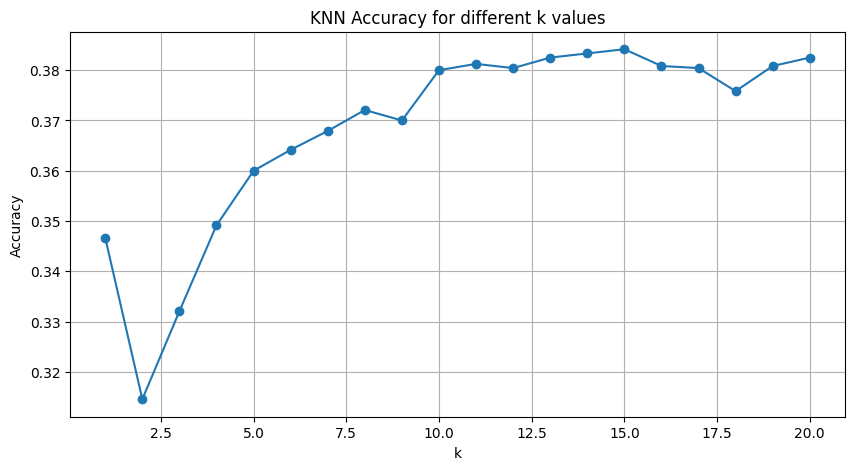

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy for different k values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [24]:
max_accuracy = max(accuracies)
max_k = k_values[accuracies.index(max_accuracy)]
max_k

15

In [25]:
k= max_k
predictions=[]
for testPoint in tqdm(X_val, desc="Predicting", unit="sample"):
    predictions.append(knn_predict(X_train, y_train, testPoint, k))

Predicting: 100%|██████████| 2400/2400 [06:52<00:00,  5.82sample/s]


In [26]:
accuracy = accuracy_score(y_val, predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 39.88%
